<a href="https://www.kaggle.com/code/megr25/titanic-keras-top-5-xgboost-and-dnn?scriptVersionId=113011117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# I. Introduction 

> Hi There.. Im  kind of new in Kaggle and Python and following other people recommendation I got the titanic Data set 
> It was the First Data set that I analyzed. please feel free to leave any feedback .. and thanks in advance

# II. OBTAINING Data

In [1]:
!pip install venndata

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#basic library 
import pandas as pd
import numpy as np
import math 
import re 

#visualization 
import matplotlib.pyplot as plt
import matplotlib
import matplotlib_venn as vplt
from venndata import venn   
from matplotlib.colors import ListedColormap
import seaborn as sns 
import cufflinks as cf 
%matplotlib inline
sns.set_style(style = 'darkgrid')
cf.go_offline()
sns.set_style('whitegrid')


In [3]:
#importing Data 
train= pd.read_csv('../input/titanic/train.csv')
test= pd.read_csv('../input/titanic/test.csv')
ID = test['PassengerId']
Vdf =pd.read_csv('../input/titanic/train.csv') #for visualization Purpose
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


massive missing value in Cabin & test data has Missing Data in Fare


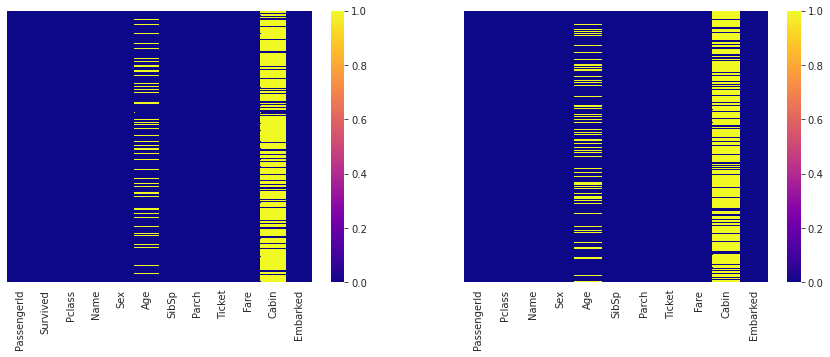

In [4]:
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(15,5))

sns.heatmap(train.isnull(), yticklabels = False , cmap = 'plasma', ax = ax1)
sns.heatmap(test.isnull(), yticklabels = False , cmap = 'plasma', ax = ax2)
print("massive missing value in Cabin & test data has Missing Data in Fare")

# III. Exploring Data , visualization

General view of survivor


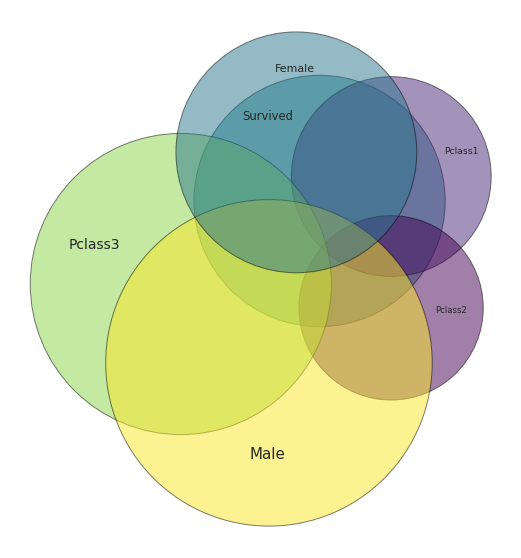

In [5]:
Vdf
#defining values

Vdf['Pclass1'] = Vdf.Pclass.apply(lambda x: 1 if x==1 else 0)
Vdf['Pclass2'] = Vdf.Pclass.apply(lambda x: 1 if x==2 else 0)
Vdf['Pclass3'] = Vdf.Pclass.apply(lambda x: 1 if x==3 else 0)
Vdf['Male'] = Vdf.Sex.apply(lambda x: 1 if x=='male' else 0)
Vdf['Female'] = Vdf.Sex.apply(lambda x: 1 if x=='female' else 0)
#Vdf['Kids'] = Vdf.Age.apply(lambda x: 1 if x<10 else 0)
#Vdf['Adoles'] = Vdf.Age.apply(lambda x: 1 if 11>x<10 else 0)
#Vdf['Adults'] = Vdf.Age.apply(lambda x: 1 if 19>x<50 else 0)
#Vdf['Elder'] = Vdf.Age.apply(lambda x: 1 if x>50 else 0)
##-----------------------------------------------------------------
   


df2 = Vdf[['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'Male', 'Female']] #,'Elder','Kids','Elder','Adoles']]
matplotlib.rcParams['figure.figsize'] = [10, 10]
fineTune=False
labels, radii, actualOverlaps, disjointOverlaps = venn.df2areas(df2, fineTune=fineTune)
fig, ax = venn.venn(radii, actualOverlaps, disjointOverlaps, 
                    labels=labels, labelsize='auto', 
                    cmap='viridis', fineTune=fineTune)

print('General view of survivor')

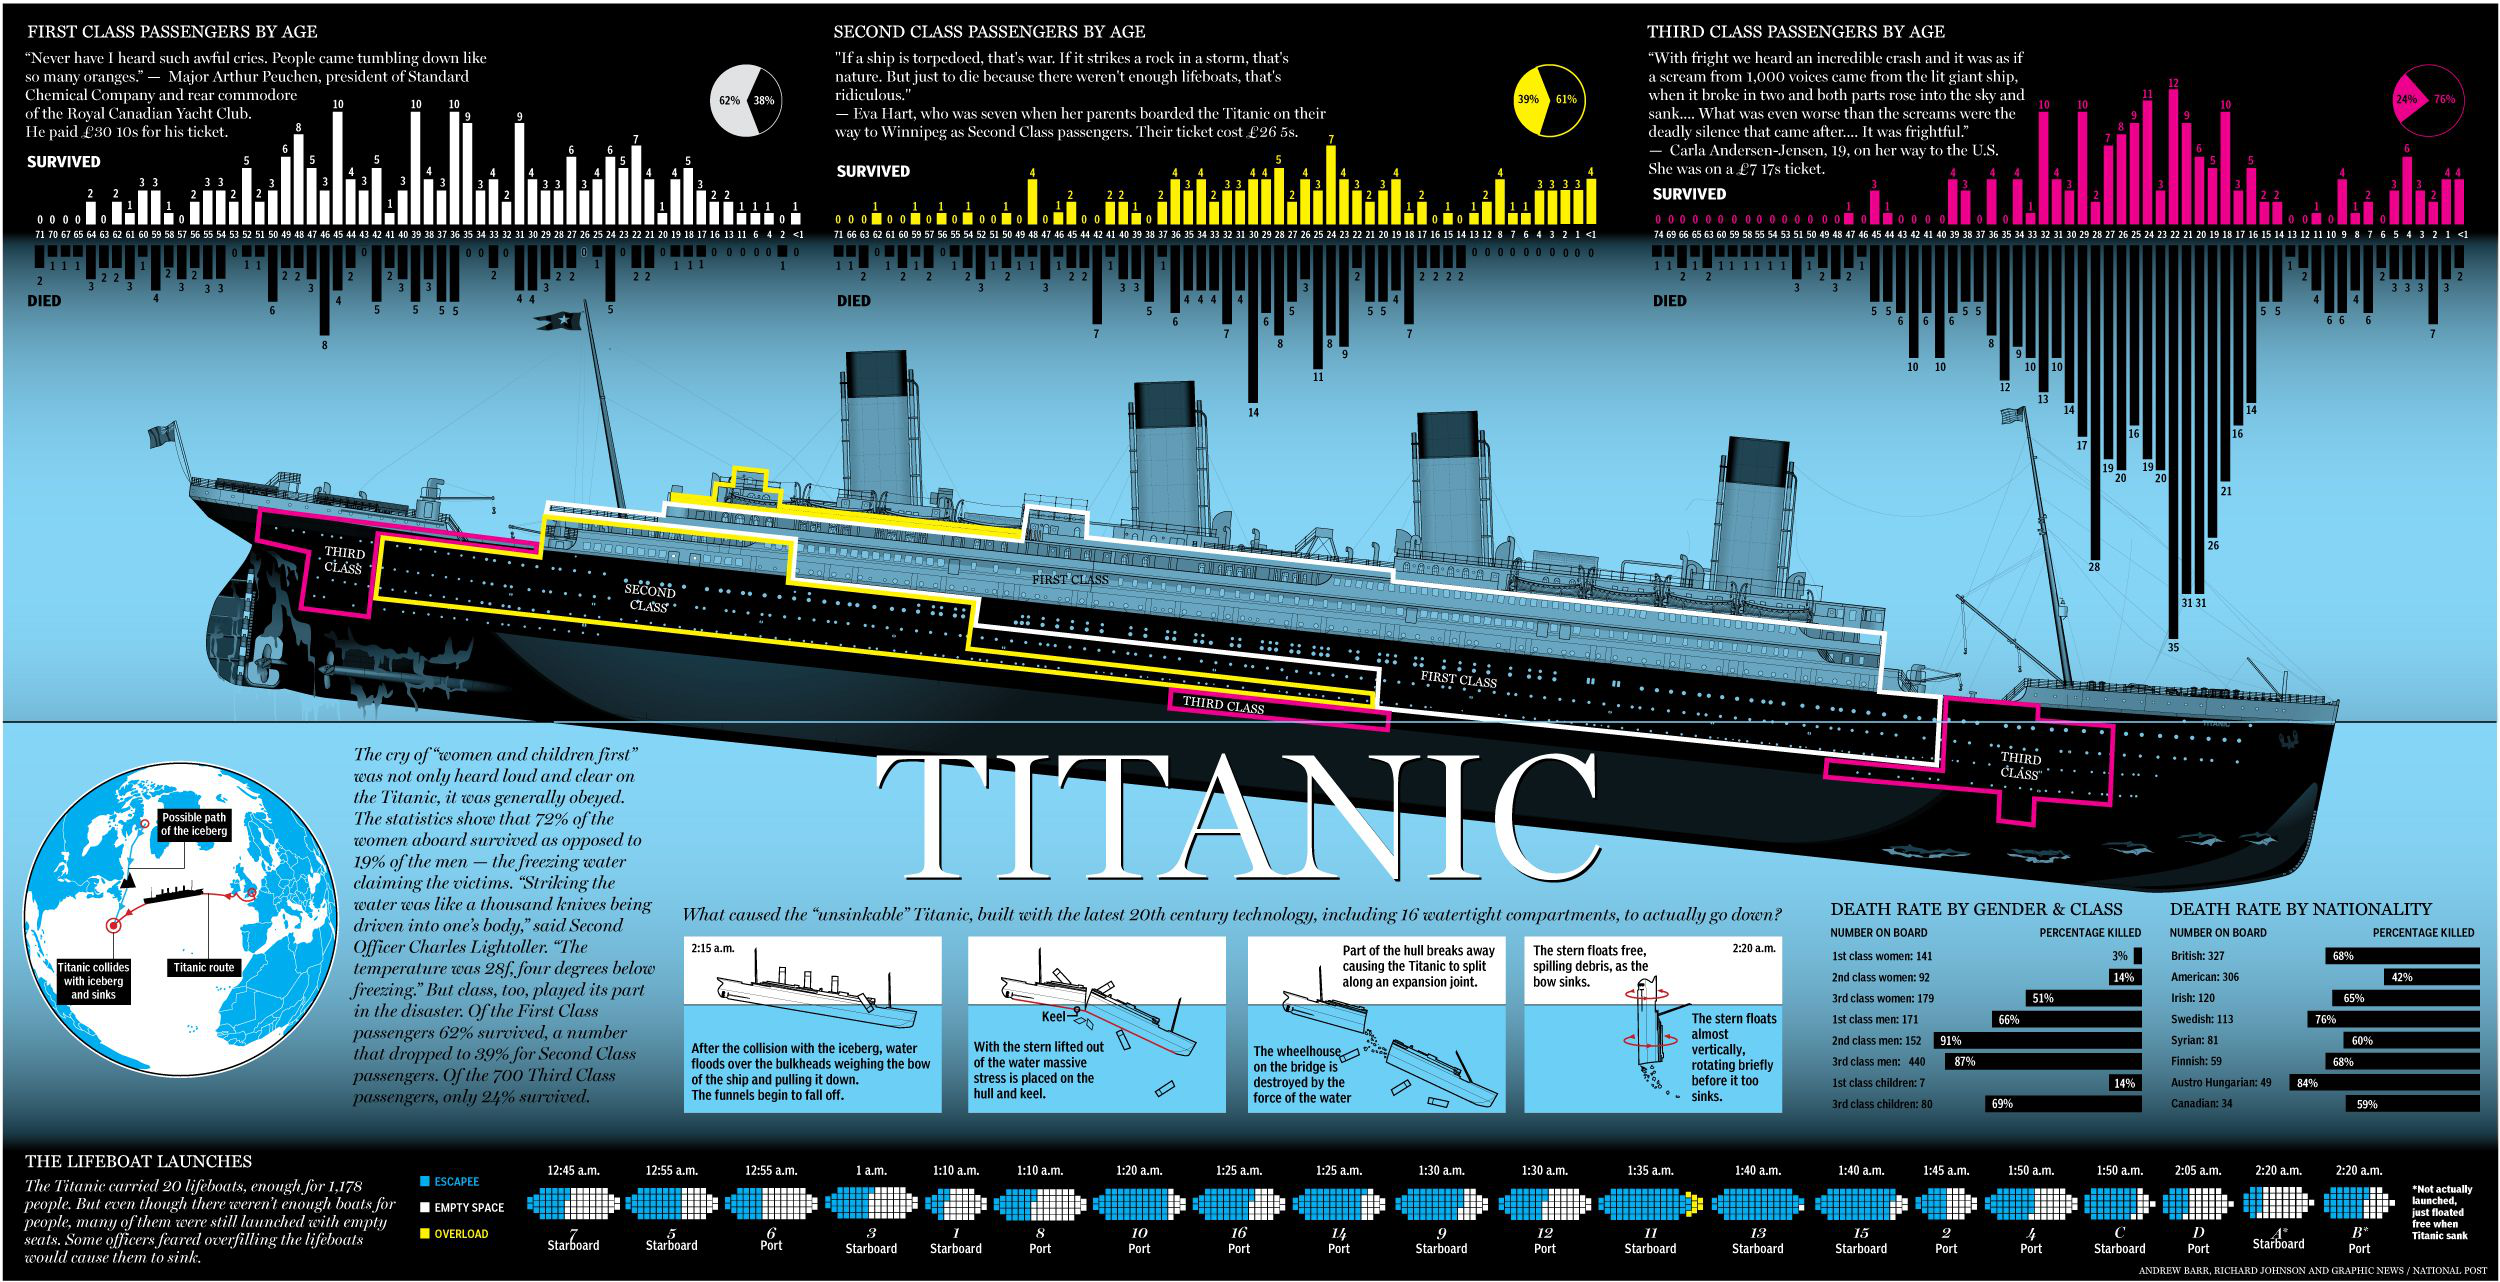

In [6]:
from IPython.display import display
from PIL import Image
path=('../input/titanic-picture-ilustrive/titanic.jpg')
display(Image.open(path))

# From this picture I can asume 
1. People in third class has less chances to survive
2. I get many insight and guidelines to make sure I am doing ok 
3. Any feedback it is welcome 

Text(0.5, 1.0, 'Survived Segmented by Sex/Pclass')

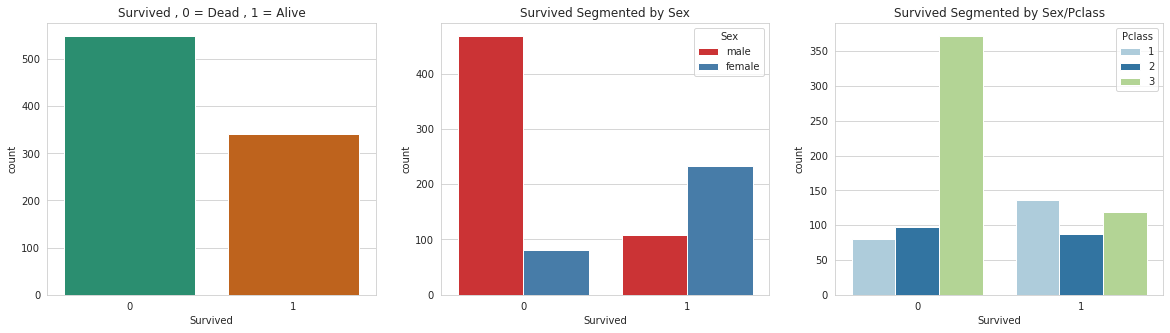

In [7]:
#Survived + Survivor segmented by sex , segmented by Pclass
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Survived' , data=train, ax=ax1 ,palette="Dark2")
ax1.set_title("Survived , 0 = Dead , 1 = Alive")
sns.countplot(x='Survived' , hue='Sex',data=train, ax=ax2, palette="Set1")
ax2.set_title("Survived Segmented by Sex")
sns.countplot(x='Survived' , hue='Pclass',data=train, ax=ax3,palette="Paired")
ax3.set_title("Survived Segmented by Sex/Pclass")

# *I know there are missing values , but in order to better understand the data I create some segmentation and them I will compare them with the new graph without NAN*

Text(0.5, 1.0, 'Age between 26- 35')

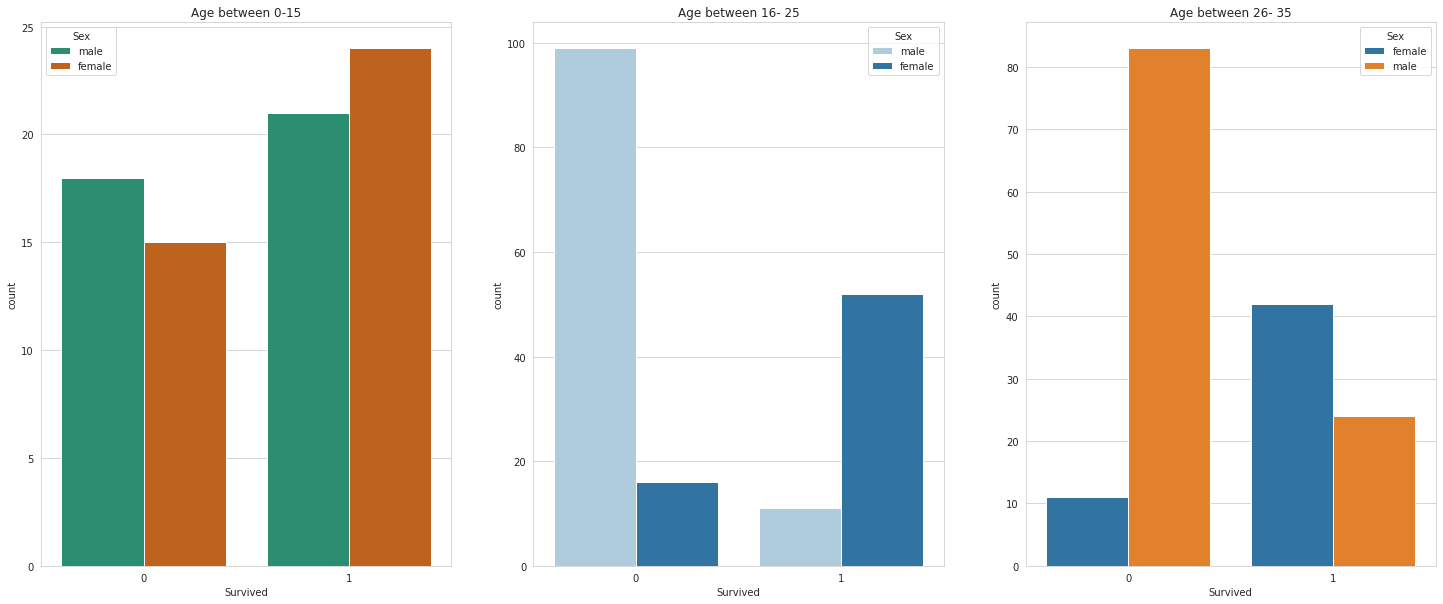

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))
sns.countplot(x='Survived' , hue = 'Sex' , data=train[train.Age < 15], ax=ax1,palette="Dark2").set_title('Age between 0-15')
sns.countplot(x='Survived' , hue = 'Sex' , data=train[(train['Age'] > 16) & (train['Age'] < 25)], ax=ax2,palette="Paired").set_title('Age between 16- 25')
sns.countplot(x='Survived' , hue = 'Sex' , data=train[(train['Age'] > 26) & (train['Age'] < 35)], ax=ax3).set_title('Age between 26- 35')

Text(0.5, 1.0, 'Age between 61- 80')

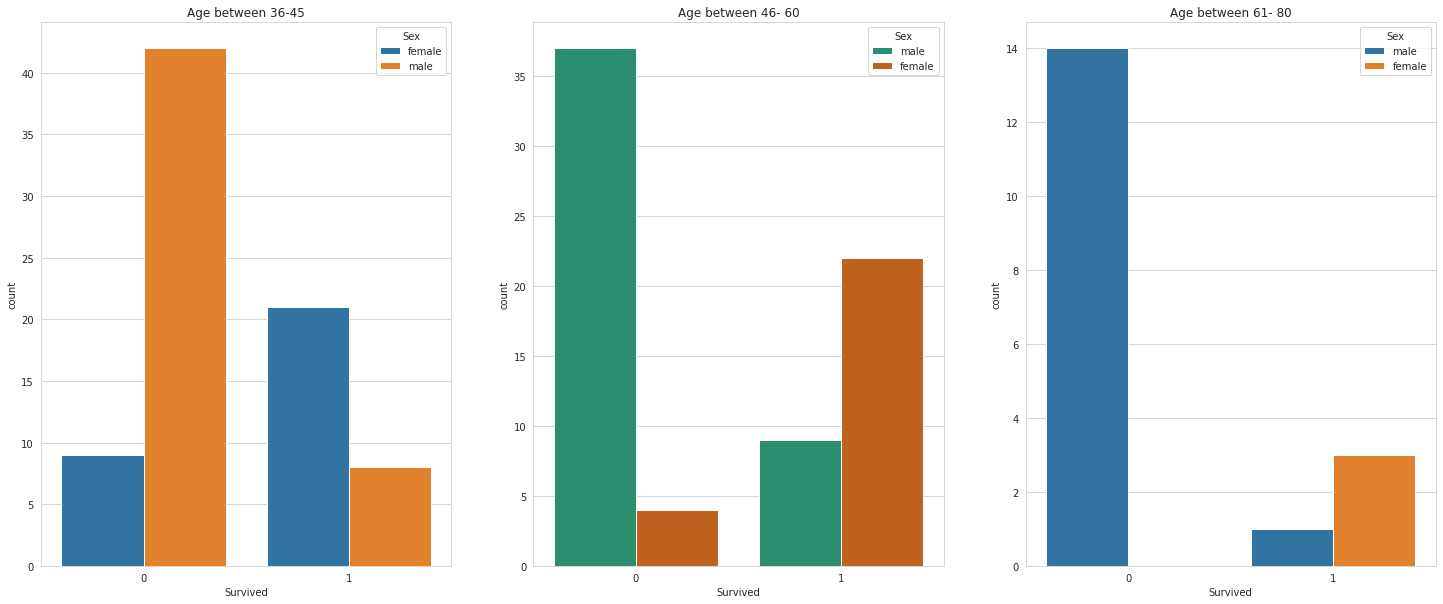

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,10))
sns.countplot(x='Survived' , hue = 'Sex' , data=train[(train['Age'] > 36) & (train['Age'] < 45)], ax=ax1).set_title('Age between 36-45')
sns.countplot(x='Survived' , hue = 'Sex' , data=train[(train['Age'] > 46) & (train['Age'] < 60)], ax=ax2,palette="Dark2").set_title('Age between 46- 60')
sns.countplot(x='Survived' , hue = 'Sex' , data=train[(train['Age'] > 61) & (train['Age'] < 80)], ax=ax3).set_title('Age between 61- 80')

Finding Missing Values in Embarked



In [10]:
#Adressing missing value in Embarked in embarked 
print(" Missing Values in Embarked:",train.isnull().sum()[5])
train[train['Embarked'].isna()]

 Missing Values in Embarked: 177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
#Now we have to Replace them both value "Southampton"
train['Embarked'].fillna("S", inplace = True)

**Would be easier fill the issing data with S because is the place where most of people were coming from , but since they are only two I looked for the info : Miss. Amelie boarded the Titanic at Southampton as maid to Mrs George Nelson Stone. She travelled on Mrs Stone's ticket (#113572). Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28. I found that info in www.encyclopedia-titanica.org**

# IV. SCRUB , Missing values - Age - Cabin , etc

**We know some people was tarveling with their family, in titanic.org the information has been collected by famiy so i will do my best to filter those family that have 7 or 8 member and find their ages
* 0    608 # traveling alone 
* 1    209 
* 2     28
* 4     18
* 3     16 # 16 Family with 3 members
* 8      7 # 7 Family with 8 members
* 5      5**

## Age

In [12]:
train[(train.Age.isna())&(train.SibSp== 8)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [13]:
sage_f = train[(train.Age.isna())&(train.SibSp== 8)]['Name'].to_list()
dbirth_ = [1907,1904,1895,1892,1891,1893,1897] #their ages in www.encyclopedia-titanica.org
dbirth= 1912 - np.array(dbirth_)  #1912 Titanic accident 
dbirth

array([ 5,  8, 17, 20, 21, 19, 15])

In [14]:
#Diccionaty 
keys = sage_f
values = dbirth
new_dict = dict(zip(keys, values))
print(new_dict)

{'Sage, Master. Thomas Henry': 5, 'Sage, Miss. Constance Gladys': 8, 'Sage, Mr. Frederick': 17, 'Sage, Mr. George John Jr': 20, 'Sage, Miss. Stella Anna': 21, 'Sage, Mr. Douglas Bullen': 19, 'Sage, Miss. Dorothy Edith "Dolly"': 15}


In [15]:
for k, v in new_dict.items():
    train.loc[train.Name == k, 'Age'] = v
    
for k, v in new_dict.items():
    test.loc[train.Name == k, 'Age'] = v

**Replacing Ages
To fill the missing values in Age , I can easily find the average age and then apply it to all of the missing value , but instead I will filter by the Mr, Mrs , Miss, Master by doing this will be more accurate**

Text(0.5, 1.0, 'Age Average per class')

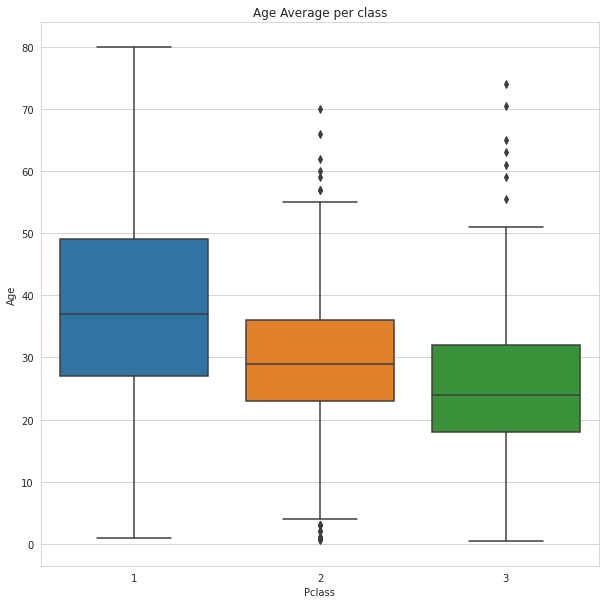

In [16]:
sns.boxplot(x='Pclass', y='Age', data=train).set_title('Age Average per class')

In [17]:
#Combining both Data set 
data_titanic = [train,test]

for data in data_titanic: #Extracting Title 
    data['Title'] = data ['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [18]:
train.Title.value_counts().to_dict() #here I will Use Mr, Miss, Mrs, Master and the rest "Others"

{'Mr': 517,
 'Miss': 182,
 'Mrs': 125,
 'Master': 40,
 'Dr': 7,
 'Rev': 6,
 'Col': 2,
 'Major': 2,
 'Mlle': 2,
 'Mme': 1,
 'Don': 1,
 'Jonkheer': 1,
 'Capt': 1,
 'Lady': 1,
 'Countess': 1,
 'Sir': 1,
 'Ms': 1}

In [19]:
tit_val = {"Mr": 2,"Miss": 1,"Mrs": 3,"Master": 0,"Dr": 2,"Rev": 2,"Col": 2,"Major": 2,"Mlle": 2,"Capt": 2,"Jonkheer": 2,"Countess": 2,"Sir": 2,"Mme": 2,"Ms": 1,"Don": 2,"Lady": 3}
for data in data_titanic:
    data['Title'] = data ['Title'].map(tit_val)

In [20]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3


In [21]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.0


In [22]:
#filling values
train.groupby('Title')['Age'].mean().round()

Title
0     5.0
1    22.0
2    33.0
3    36.0
Name: Age, dtype: float64

In [23]:
#Now We can Fill the Age 
def impute_age (col): 
    Age=col[0]
    Title=col[1]
    
    if pd.isnull(Age):
        
        if Title== 0 :
            return 5
        elif Title == 1:
            return 22
        elif Title == 2:
            return 33
        else:
            return 36
    else:
        return Age

In [24]:
train['Age'] = train[['Age','Title']].apply(impute_age, axis = 1)
test['Age'] = test[['Age','Title']].apply(impute_age, axis = 1)

Master: 0, Miss: 1, Mr: 2, Mrs: 3


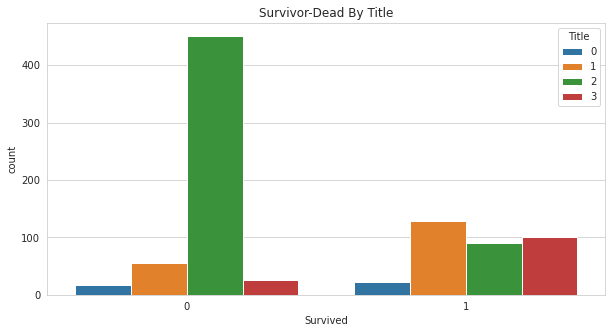

In [25]:
fig,(ax1) = plt.subplots(1,1 , figsize=(10,5))
sns.countplot(x = 'Survived' , data= train , hue = 'Title', ax = ax1).set_title("Survivor-Dead By Title")
print("Master: 0, Miss: 1, Mr: 2, Mrs: 3")

## Cabin

**> Filling Cabin Information : Cabin could be a great parameter but it has too many missing value, however I can notice the distribution was "first class had the top decks (A-E)","second class (D-F)", and "third class (E-G)" In the image (on the notebook) , I can notice that, 3rd class was in the fron/back , 2nd class was in the middle , 1st class on the top
So In think that Cabit and pclass are related if we change cabin to 1 2 3 we will have the same results**

In [26]:
def cabins (col):
    classes = col[0]
    cabin = col[1]
    
    if classes == 1:
        return 3
    elif classes == 2:
        return 2
    else:
        return 1 

No Missing Values


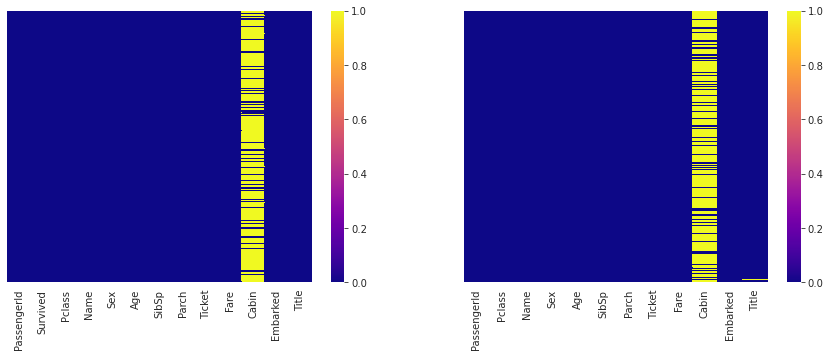

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2 , figsize=(15,5))

sns.heatmap(train.isnull(), yticklabels = False , cmap = 'plasma', ax = ax1)
sns.heatmap(test.isnull(), yticklabels = False , cmap = 'plasma', ax = ax2)
print("No Missing Values")

# V. Modeling 

### Test Part

In [28]:
p_data= train  # I will save train as p_Data because i will try so many different algorithms 

In [29]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,LabelBinarizer

#Missing Values
#print(p_data.isnull().sum())
p_data['Embarked'].fillna('S', inplace= True)

#Step_1 Combine SibSp & Parch
p_data['F_A'] = p_data['SibSp']+p_data['Parch']
p_data['F_A'] =p_data.F_A.apply(lambda x :2 if x>0 else 1)

#Step_2 Transform Cabin
p_data['Cabin_'] =p_data[['Pclass','Cabin']].apply(cabins, axis=1)

#Step 3 Encoding Sex
sex = pd.get_dummies(p_data['Sex'],drop_first= True)
p_data = pd.concat([p_data,sex],axis = 1)

#step_4 Drop columns
p_data.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Sex'], axis = 1 , inplace = True)
p_data

#Step 5 Onehot
ohc = OneHotEncoder()
Xtest= p_data.iloc[:,3].values
Xtest = Xtest.reshape(-1,1)
EMB = ohc.fit_transform(Xtest).toarray()
EB= pd.DataFrame(EMB,columns = ['S','C','Q'])
p_data = pd.concat([p_data ,EB], axis = 1)
p_data.drop('Embarked', axis = 1 , inplace = True)
p_data

,Survived,Age,Fare,Title,F_A,Cabin_,male,S,C,Q
0,0,22.0,7.2500,2,2,1,1,0.0,0.0,1.0
1,1,38.0,71.2833,3,2,3,0,1.0,0.0,0.0
2,1,26.0,7.9250,1,1,1,0,0.0,0.0,1.0
3,1,35.0,53.1000,3,2,3,0,0.0,0.0,1.0
4,0,35.0,8.0500,2,1,1,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,2,1,2,1,0.0,0.0,1.0
887,1,19.0,30.0000,1,1,3,0,0.0,0.0,1.0
888,0,22.0,23.4500,1,2,1,0,0.0,0.0,1.0
889,1,26.0,30.0000,2,1,3,1,1.0,0.0,0.0


### Test Part

In [30]:
#Missing Values
#print(p_data.isnull().sum())
test['Title'].fillna(1, inplace= True)
test['Fare'].fillna(35.6271, inplace= True)

#Step_1 Combine SibSp & Parch
test['F_A'] = test['SibSp']+test['Parch']
test['F_A'] =test.F_A.apply(lambda x :2 if x>0 else 1)

#Step_2 Transform Cabin
test['Cabin_'] =test[['Pclass','Cabin']].apply(cabins, axis=1)

#Step 3 Encoding Sex
sex = pd.get_dummies(test['Sex'],drop_first= True)
test = pd.concat([test,sex],axis = 1)

#step_4 Drop columns
test.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Sex'], axis = 1 , inplace = True)

#Step 5 Change into Categorical 
ohc = OneHotEncoder()
Xohc= test.iloc[:,2].values
Xohc= Xohc.reshape(-1,1)
EMB = ohc.fit_transform(Xohc).toarray()
EB= pd.DataFrame(EMB,columns = ['S','C','Q'])
test = pd.concat([test ,EB], axis = 1)
test.drop('Embarked', axis = 1 , inplace = True)
test

,Age,Fare,Title,F_A,Cabin_,male,S,C,Q
0,34.5,7.8292,2.0,1,1,1,0.0,1.0,0.0
1,47.0,7.0000,3.0,2,1,0,0.0,0.0,1.0
2,62.0,9.6875,2.0,1,2,1,0.0,1.0,0.0
3,27.0,8.6625,2.0,1,1,1,0.0,0.0,1.0
4,22.0,12.2875,3.0,2,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,33.0,8.0500,2.0,1,1,1,0.0,0.0,1.0
414,39.0,108.9000,1.0,1,3,0,1.0,0.0,0.0
415,38.5,7.2500,2.0,1,1,1,0.0,0.0,1.0
416,33.0,8.0500,2.0,1,1,1,0.0,0.0,1.0


In [31]:
test_1 = test

## Applying MinMax scaler and Standar Scaler 

In [32]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,cross_validate
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#Testing
data_1 = p_data  # <----- Standar Scaler
data_2 = p_data  # <----- MinMax
data_3 = p_data  # <----- 


#Difining X
X_1=data_1.drop('Survived',axis = 1)
X_2=data_2.drop('Survived',axis = 1)
X_3=data_3.drop('Survived',axis = 1)

y=p_data['Survived']

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42,stratify=data_2['Cabin_'])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=42,stratify=data_2['Cabin_'])


# MinMax
MX= MinMaxScaler()
X_1 = MX.fit_transform(X_1)
X_train = MX.fit_transform(X_train)
X_test = MX.fit_transform(X_test)
test_MX = MX.fit_transform(test_1)

# Standar Scalar 
SC = StandardScaler()
X_2 = SC.fit_transform(X_2)
X_train_2 = SC.fit_transform(X_train_2)
X_test_2 = SC.fit_transform(X_test_2)
test_SC = SC.fit_transform(test_1)

print("Segmenting Data ....... into Two sets ....Done...!!  ")
print("Splitting Data into X_train and X_test... Done..!!  ")
print("Applying MinMax Scaler & Standard Scaler .... Done..!!")

Segmenting Data ....... into Two sets ....Done...!!  
Splitting Data into X_train and X_test... Done..!!  
Applying MinMax Scaler & Standard Scaler .... Done..!!


In [33]:
#General Fuction to evaluate Model 

def Evaluating (model,X,y,CV, criteria=True):
    if criteria :
        score = cross_val_score(model,X=X ,y=y ,cv=CV, scoring='accuracy', n_jobs= 4)
        score = np.mean(score)
        accuracy.append(score)
    
    else:
        pred = cross_val_predict(model,X=X ,y=y ,cv=CV, n_jobs= 4)
        prediction.append(pred)
        
print("Creating General fuction to Evaluate Algorithms.....Done")

Creating General fuction to Evaluate Algorithms.....Done


# Machine Learning

## Baseline

In [34]:
#Machine Learning
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB


LGR = LogisticRegression()

XG = xgb.XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=0.9539552926340813, gamma=0.08955017265494192,
                learning_rate=0.07004776526310222, max_delta_step=0,
                max_depth=24, min_child_weight=1.667528606432285, missing=None,
                n_estimators=230, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.9219040847026176, verbosity=1)
SVM_1= svm.SVC(probability = True)

SVM_2= svm.SVC()

RF = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
BG = BaggingClassifier(RF)
NB = GaussianNB()

accuracy = []
prediction =[]

for i in [LGR, XG, SVM_1, SVM_2,  RF,BG, NB]:
      Evaluating(i,X_1,y,CV=5)        

print("Processing....... Done..... ")
print("Using Cross_Validation and MinMax Scaler with 5 Folds ......Check the Accuracy Below!!")

MINMAX = pd.DataFrame(accuracy, index = ['LGR','XG','SVM_1','SVM_2','RF','BG','NB'], columns = ['MINMAX_Accuracy'])

Processing....... Done..... 
Using Cross_Validation and MinMax Scaler with 5 Folds ......Check the Accuracy Below!!


In [35]:
accuracy = []
prediction =[]

for i in [LGR,XG, SVM_1, SVM_2,  RF, BG, NB]:
      Evaluating(i,X_2,y,CV=5)


print("Processing....... Done..... ")
print("Using Cross_Validation and Standard Scaler with 5 Folds ......Check the Accuracy Below!!")
SCALER = pd.DataFrame(accuracy, index = ['LGR','XG','SVM_1','SVM_2','RF','BG','NB'], columns = ['SC_Accuracy'])

print("It seems no to have a significant change no matter what approach I use")

pd.concat([MINMAX,SCALER],axis = 1)

Processing....... Done..... 
Using Cross_Validation and Standard Scaler with 5 Folds ......Check the Accuracy Below!!
It seems no to have a significant change no matter what approach I use


,MINMAX_Accuracy,SC_Accuracy
LGR,0.784521,0.789015
XG,0.831693,0.830576
SVM_1,0.818197,0.822673
SVM_2,0.818197,0.822673
RF,0.830550,0.831662
BG,0.821587,0.823803
NB,0.770027,0.770027


## Precision Recall 

** In here i can find a balance between Recall and Precision , actually with a threshold of 0.7 using Randon Forest i got 0. 78 in the Leader board"**

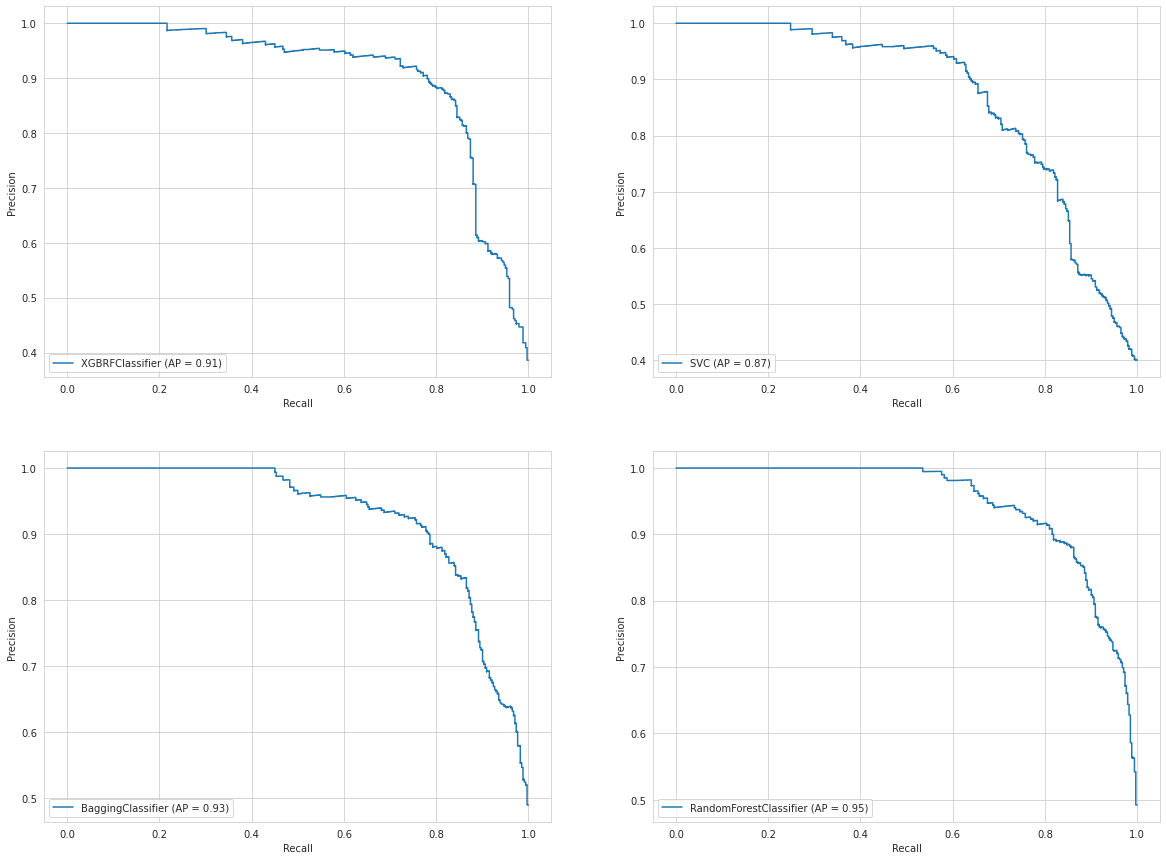

In [36]:
from sklearn.metrics import plot_precision_recall_curve

for i in [XG, SVM_1, SVM_2,  RF, BG, NB]:
    i.fit(X_2,y)

fig,axs= plt.subplots(2,2, figsize = (20,15))
plot_precision_recall_curve(XG,X_2,y,ax=axs[0,0])
plot_precision_recall_curve(SVM_1,X_2,y,ax=axs[0,1])
plot_precision_recall_curve(BG,X_2,y,ax=axs[1,0])
plot_precision_recall_curve(RF,X_2,y,ax=axs[1,1])
plt.show("Precision VS ReCall")

> ## Emsembling

### Soft

In [37]:
from sklearn.ensemble import VotingClassifier
print("Emsembling models..... RandomForest, Support Vector Machine, etc, ........\n")
modelos = [('RandomForest', RF),('BG',BG), ('SVM_1',SVM_1),('XGboost',XG)]

threshold_1 = 0.8
threshold_2 = 0.7

VC= VotingClassifier(estimators = modelos,voting='soft',n_jobs=3)
VC.fit(X_train_2,y_train_2)

for i in [RF, BG , SVM_1, XG,VC]:
    
    if i == RF:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict_proba(X_test_2)
        y_pred = [1 if predictions[i][1]>threshold_1 else 0  for i in range(len(predictions))]
        
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
        
    elif i == BG:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict_proba(X_test_2)
        y_pred = [1 if predictions[i][1]>threshold_2 else 0  for i in range(len(predictions))]
        
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
        
    else:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict(X_test_2)
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
    

print("\nTesting Vagging Classifier .... Applying Cross Validation.....!!")
scores = cross_val_score(estimator=VC,X=X_2,y=y,cv=5,scoring='accuracy')
print("Mean Score =", np.mean(scores))

Emsembling models..... RandomForest, Support Vector Machine, etc, ........

RandomForestClassifier 0.8100558659217877
BaggingClassifier 0.8044692737430168
SVC 0.8044692737430168
XGBRFClassifier 0.8044692737430168
VotingClassifier 0.8044692737430168

Testing Vagging Classifier .... Applying Cross Validation.....!!
Mean Score = 0.8249199673592367


### Hard

In [38]:
from sklearn.ensemble import VotingClassifier
print("Emsembling models..... RandomForest, Support Vector Machine, etc, ........\n")
modelos = [('RandomForest', RF),('BG',BG), ('SVM_1',SVM_1),('XGboost',XG)]

threshold_1 = 0.8
threshold_2 = 0.8

VC= VotingClassifier(estimators = modelos,voting='hard',n_jobs=3 , weights = [2,4,4,4])
VC.fit(X_train_2,y_train_2)

for i in [RF, BG , SVM_1, XG,VC]:
    
    if i == RF:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict_proba(X_test_2)
        y_pred = [1 if predictions[i][1]>threshold_1 else 0  for i in range(len(predictions))]
        
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
        
    elif i == BG:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict_proba(X_test_2)
        y_pred = [1 if predictions[i][1]>threshold_2 else 0  for i in range(len(predictions))]
        
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
        
    else:
        i.fit(X_train_2,y_train_2)
        predictions = i.predict(X_test_2)
        print(i.__class__.__name__,accuracy_score(y_test_2,y_pred))
    

print("\nTesting Vagging Classifier .... Applying Cross Validation.....!!")
scores = cross_val_score(estimator=VC,X=X_2,y=y,cv=5,scoring='accuracy')
print("Mean Score =", np.mean(scores))

Emsembling models..... RandomForest, Support Vector Machine, etc, ........

RandomForestClassifier 0.8100558659217877
BaggingClassifier 0.7932960893854749
SVC 0.7932960893854749
XGBRFClassifier 0.7932960893854749
VotingClassifier 0.7932960893854749

Testing Vagging Classifier .... Applying Cross Validation.....!!
Mean Score = 0.8294331805913


In [39]:
# Prediction
y_pred = VC.predict(test_SC)

sub = pd.DataFrame()
sub['PassengerId'] = ID
sub['Survived'] = y_pred
sub.to_csv('VC_prediction_1.csv', index=False)
print("Predicting .......! ")
print("Submission has been saved")
print("Accurancy up to 0.77990")

Predicting .......! 
Submission has been saved
Accurancy up to 0.77990


# VI. Deep Learning

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

#Early Stop
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=25, 
        verbose=1, mode='auto', restore_best_weights=True)

NN= Sequential()

NN.add(Dense(9,activation = 'relu',input_shape=[9 ,]))
NN.add(Dense(5,activation ='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(2,activation ='relu'))
NN.add(Dense(1,activation='sigmoid'))
NN.compile(optimizer='adam', loss= 'binary_crossentropy', metrics = ['accuracy'] )

NN.fit(x=X_train_2, y=y_train_2,validation_data = (X_test_2, y_test_2) , epochs=600,batch_size=700 ,verbose = 0)



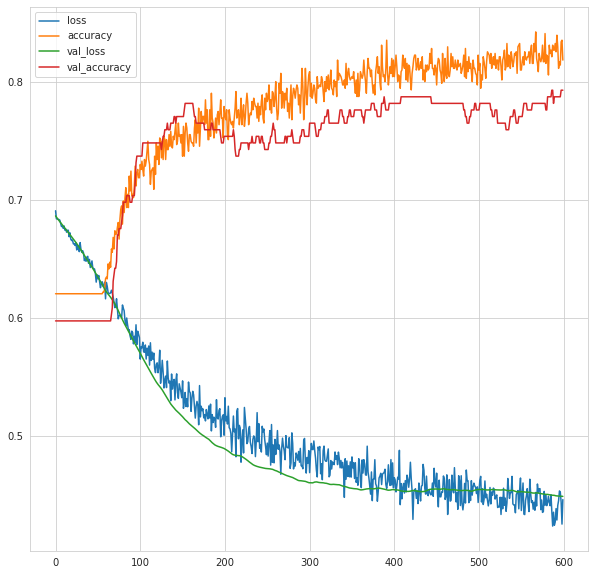

In [41]:
pd.DataFrame(NN.history.history).plot()
plt.show()

In [42]:
threshold = 0.6

predictions = NN.predict_proba(test_SC)
y_pred = [1 if predictions[i]>threshold else 0  for i in range(len(predictions))]

sub = pd.DataFrame()
sub['PassengerId'] = ID
sub['Survived'] = y_pred
sub.to_csv('NN_predic_0.6 prediction_500.csv', index=False)
print("Predicting 0.7829 Accuracy.......! ")
print("Submission has been saved")

Predicting 0.7829 Accuracy.......! 
Submission has been saved


# -----------------Final Thoughts-----------------
1. Thanks for passing by .. I added Voting classifier, SVM , Xgossbost , And Neural Network , however They all have the same output 0.79 Score 
2. We can see here that the way we process data it is more important that the model that we use
3. I Will keep Working on this but please feel free to leave some comments 